# Completeness and Contamination

This Notebook is for the re-development and quantification of completeness and contamination of AGB stars

Jump to plots (<a href="#Create-Plots">here</a>)

In [1]:
## Importing my packages
import numpy as np
import os
import matplotlib
font = {'family' : 'normal',
        'size'   : 16}

matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12) 

import matplotlib.pyplot as plt

%matplotlib inline
import pandas as pd
import locale
locale.setlocale(locale.LC_ALL, 'en_US')

'en_US'

In [2]:
## The file names for my contaminant samples
cont_dir = "../contaminants/"
contam_files = [cont_dir+"lrg_allwise_allmags.dat", cont_dir+"vagc_allwise_allmags.dat",
                cont_dir+"pne_allwise_allmags.dat", cont_dir+"yso_allwise_allmags.dat",
                cont_dir+"dr12_sspp_allwise_allmags_w4snr_gt_3.dat"]

In [3]:
## The file names for my AGB samples
samp_dir = "../samples/"
sample_files = [samp_dir+"macho_allwise_allmags.dat", 
                samp_dir+"ogle3_allwise_allmags.dat", 
                samp_dir+"simbad_allwise_allmags.dat"]

In [4]:
## Reading the data into pandas dataframes
macho = pd.read_csv(sample_files[0], sep="\t")
ogle = pd.read_csv(sample_files[1], sep="\t")
simbad = pd.read_csv(sample_files[2], sep="\t")

lrg = pd.read_csv(contam_files[0], sep="\t")
vagc = pd.read_csv(contam_files[1], sep="\t")
yso = pd.read_csv(contam_files[2], sep="\t")
pne = pd.read_csv(contam_files[3], sep="\t")
sspp = pd.read_csv(contam_files[4], sep="\t")

/Users/Nick/anaconda/lib/python2.7/site-packages/pandas/io/parsers.py:1139: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


## Data-manipulation functions

In [5]:
def clean_me(df):
    """
    Returns a dataframe for the sample where
    objects are within faint and saturation limits.
    We also cut on:
        Contamination & Confusion flags
        Number of 2MASS matches (limited to 1 and only 1)
        Signal to Noise ratios (> 3 for WISE bands)
        Extended source flags (<= 2)
        
    Adds columns for the following colors:
        coljh: J-H
        colhk: H-K
        coljk: J-K
        col12: W1-W2
        col23: W2-W3
        col34: W3-W4
        col13: W1-W3
    """
    fntlims = [16.83,15.6,11.32,8.0,16.5,16.0,15.5] ## W1-4, J, H, K
    brtlims = [2.0,1.5,-3.0,-4.0] ## W1-4
    
    df.glon[df.glon > 180] = df.glon[df.glon > 180] - 360
    
    if "w1" in df.columns:
        if "ccflag" in df.columns:
            if "match_rad" in df.columns:
                cut = (df.w1 < fntlims[0]) & (df.w2 < fntlims[1]) & (df.w3 < fntlims[2]) & (df.w4 < fntlims[3]) & (df.w1 > brtlims[0]) & (df.w2 > brtlims[1]) & (df.w3 > brtlims[2]) & (df.w4 > brtlims[3]) & (df.ccflag == "0000") & (df.n2mass == 1) & (df.w1snr > 3) & (df.w2snr > 3) & (df.w3snr > 3) & (df.w4snr > 3) & (df.extflg <= 2) & (df.match_rad <= 3)
            elif "match_dist" in df.columns: 
                cut = (df.w1 < fntlims[0]) & (df.w2 < fntlims[1]) & (df.w3 < fntlims[2]) & (df.w4 < fntlims[3]) & (df.w1 > brtlims[0]) & (df.w2 > brtlims[1]) & (df.w3 > brtlims[2]) & (df.w4 > brtlims[3]) & (df.ccflag == "0000") & (df.n2mass == 1) & (df.w1snr > 3) & (df.w2snr > 3) & (df.w3snr > 3) & (df.w4snr > 3) & (df.extflg <= 2) & (df.match_dist <= 3)
            else: 
                cut = (df.w1 < fntlims[0]) & (df.w2 < fntlims[1]) & (df.w3 < fntlims[2]) & (df.w4 < fntlims[3]) & (df.w1 > brtlims[0]) & (df.w2 > brtlims[1]) & (df.w3 > brtlims[2]) & (df.w4 > brtlims[3]) & (df.ccflag == "0000") & (df.n2mass == 1) & (df.w1snr > 3) & (df.w2snr > 3) & (df.w3snr > 3) & (df.w4snr > 3) & (df.extflg <= 2)

        else:
            cut = (df.w1 < fntlims[0]) & (df.w2 < fntlims[1]) & (df.w3 < fntlims[2]) & (df.w4 < fntlims[3]) & (df.w1 > brtlims[0]) & (df.w2 > brtlims[1]) & (df.w3 > brtlims[2]) & (df.w4 > brtlims[3]) & (df.n2mass == 1) & (df.w1snr > 3) & (df.w2snr > 3) & (df.w3snr > 3) & (df.w4snr > 3) & (df.extflg <= 2)

        df["coljh"] = df.jmag - df.hmag
        df["colhk"] = df.hmag - df.kmag
        df["coljk"] = df.jmag - df.kmag
        df["col12"] = df.w1 - df.w2
        df["col23"] = df.w2 - df.w3
        df["col34"] = df.w3 - df.w4
        df["col13"] = df.w1 - df.w3
            
    else:
        if "ccflag" in df.columns:
            cut = (df.w1mpro < fntlims[0]) & (df.w2mpro < fntlims[1]) & (df.w3mpro < fntlims[2]) & (df.w4mpro < fntlims[3]) & (df.w1mpro > brtlims[0]) & (df.w2mpro > brtlims[1]) & (df.w3mpro > brtlims[2]) & (df.w4mpro > brtlims[3]) & (df.ccflag == "0000") & (df.n_2mass == 1) & (df.w1snr > 3) & (df.w2snr > 3) & (df.w3snr > 3) & (df.w4snr > 3) & (df.ext_flg <= 2)
        else:
            cut = (df.w1mpro < fntlims[0]) & (df.w2mpro < fntlims[1]) & (df.w3mpro < fntlims[2]) & (df.w4mpro < fntlims[3]) & (df.w1mpro > brtlims[0]) & (df.w2mpro > brtlims[1]) & (df.w3mpro > brtlims[2]) & (df.w4mpro > brtlims[3]) & (df.n_2mass == 1) & (df.w1snr > 3) & (df.w2snr > 3) & (df.w3snr > 3) & (df.w4snr > 3) & (df.ext_flg <= 2)


        df["coljh"] = df.j_m_2mass - df.h_m_2mass
        df["colhk"] = df.h_m_2mass - df.k_m_2mass
        df["coljk"] = df.j_m_2mass - df.k_m_2mass
        df["col12"] = df.w1mpro - df.w2mpro
        df["col23"] = df.w2mpro - df.w3mpro
        df["col34"] = df.w3mpro - df.w4mpro
        df["col13"] = df.w1mpro - df.w3mpro

    return df[cut]

In [6]:
def cut_me(df):
    """
    Returns a dataframe with objects subjected
    to WISE-2MASS cuts, created specifically 
    for AGB stars in WISE color-color space
    
    Cuts:
        (J − Ks) > 1.1
        (W2 − W3) > 0.3
        (W3 − W4) < −0.83(W2 − W3) + 3.37
    """
    if "w1" in df.columns:
        col1 = df.jmag - df.kmag
        col2 = df.w2 - df.w3
        col3 = df.w3 - df.w4

    else:
        col1 = df.j_m_2mass - df.k_m_2mass
        col2 = df.w2mpro - df.w3mpro
        col3 = df.w3mpro - df.w4mpro
            
    cut = (col1 > 1.1) & (col2 > 0.3) & (col3 < -0.83*col2 + 3.37) #* (col3 < col2*0.21+1)
    
    return df[cut]


In [7]:
def combine_dfs(dfs):
    """
    This function is for combining data frames 
    into one, with common columns so that we 
    don't have null values and whatnot, AND
    with unique sources.
    The standard is...
    
    wisename
    ra, decl, glon, glat
    jmag, hmag, kmag
    jerr, herr, kerr
    w1, w2, w3, w4
    w1err, w2err, w3err, w4err
    ccflag, match_rad, n2mass, r2mass
    extflg, var_flg
    """
    ## Loop through dataframes and rename columns
    for ii in range(len(dfs)):
        rename_these = {}
        if "designation" in dfs[ii].columns:
            rename_these["designation"] = "wisename"
        if "cc_flags" in dfs[ii].columns:
            rename_these["cc_flags"] = "ccflag"
        if "ext_flg" in dfs[ii].columns:
            rename_these["ext_flg"] = "extflg"
        if "j_m_2mass" in dfs[ii].columns:
            rename_these["j_m_2mass"] = "jmag"
        if "h_m_2mass" in dfs[ii].columns:
            rename_these["h_m_2mass"] = "hmag"
        if "k_m_2mass" in dfs[ii].columns:
            rename_these["k_m_2mass"] = "kmag"
        if "j_msig_2mass" in dfs[ii].columns:
            rename_these["j_msig_2mass"] = "jerr"
        if "h_msig_2mass" in dfs[ii].columns:
            rename_these["h_msig_2mass"] = "herr"
        if "k_msig_2mass" in dfs[ii].columns:
            rename_these["k_msig_2mass"] = "kerr"
        if "n_2mass" in dfs[ii].columns:
            rename_these["n_2mass"] = "n2mass"
        if "r_2mass" in dfs[ii].columns:
            rename_these["r_2mass"] = "r2mass"
        if "w1mpro" in dfs[ii].columns:
            rename_these["w1mpro"] = "w1"
        if "w2mpro" in dfs[ii].columns:
            rename_these["w2mpro"] = "w2"
        if "w3mpro" in dfs[ii].columns:
            rename_these["w3mpro"] = "w3"
        if "w4mpro" in dfs[ii].columns:
            rename_these["w4mpro"] = "w4"
        if "w1sigmpro" in dfs[ii].columns:
            rename_these["w1sigmpro"] = "w1err"
        if "w2sigmpro" in dfs[ii].columns:
            rename_these["w2sigmpro"] = "w2err"
        if "w3sigmpro" in dfs[ii].columns:
            rename_these["w3sigmpro"] = "w3err"
        if "w4sigmpro" in dfs[ii].columns:
            rename_these["w4sigmpro"] = "w4err"
        if "matchrad_as" in dfs[ii].columns:
            rename_these["matchrad_as"] = "match_rad"
        if "matchrad_dist" in dfs[ii].columns:
            rename_these["matchrad_dist"] = "match_rad"
        if "dist_x" in dfs[ii].columns:
            rename_these["dist_x"] = "match_rad"
        if "dec" in dfs[ii].columns:
            rename_these["dec"] = "decl"
        if "wdecl" in dfs[ii].columns:
            rename_these["wdecl"] = "decl"
        if "wra" in dfs[ii].columns:
            rename_these["wra"] = "ra"
            
        dfs[ii].rename(columns=rename_these, inplace=True)
    
    unique_dfs = pd.concat(dfs)

    ## Create a list of unique wise designations from df[0]
    ## Create a corresponding boolean array of all Trues
    ## Check the wise designations in the next df 
    ## Add new designations to the list
    ## Add appropriate boolean to new list of booleans
    ## 
    ## Concatenate dataframes with booleans
    names = []
    unique_dfs = []
    for ii in range(len(dfs)):
        bools = []
        for jj in range(len(dfs[ii])):
            if dfs[ii].iloc[jj].wisename not in names:
                names.append(dfs[ii].iloc[jj].wisename)
                bools.append(True)
            else:
                bools.append(False)
        
        bools = np.array(bools)
        unique_dfs.append(dfs[ii][bools])
        
    unique_dfs = pd.concat(unique_dfs)
    return unique_dfs

## Plotting Functions

In [8]:
def galactic_pos(df, histo=True):
    
    fig = plt.figure(figsize=(6,4))
    ax = plt.subplot(111)
    if histo==True:
        dx = 1.
        dy = 1.

        xbins = np.arange(-180., 180.+dx, dx)
        ybins = np.arange(-90., 90.+dy, dy)
        Htot, xedges, yedges = np.histogram2d(df.glon, df.glat, bins=(xbins, ybins))
        extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
        imap = ax.imshow(np.log10(Htot.T), extent=extent, aspect="auto", interpolation="nearest", cmap=plt.cm.cubehelix, origin="lower")
    
    else:
        ax.scatter(df.glon, df.glat, s=1, c='k', edgecolor='None')
    ax.set_xlim(-179,179)
    ax.set_ylim(-89,89)
    ax.set_xlabel("glon")
    ax.set_ylabel("glat")
    ax.minorticks_on()
    
    plt.show()

In [9]:
def color_color(df, xmag1, xmag2, ymag1, ymag2, scatter=False, plttext=None, xmax=4, ymax=4, fname=None):
    xcolor = df[xmag1] - df[xmag2]
    ycolor = df[ymag1] - df[ymag2]
    
    dx = dy = 0.05
    
    xbins = np.arange(-0.5, 4.+dx, dx)
    ybins = np.arange(-0.5, 4.+dy, dy)
    H, xedges, yedges = np.histogram2d(xcolor, ycolor, bins=(xbins,ybins))
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    
    fig = plt.figure(figsize=(7,5))
    fig.subplots_adjust(left=0.1, right=0.95, top=0.95, bottom=0.1)
    ax = plt.subplot(111)

    if scatter == True:
        ax.scatter(xcolor, ycolor, s=1, edgecolor="None", c='k')
    else:
        imap = ax.contourf(np.log10(H.T), extent=extent, aspect="auto", interpolation="nearest", cmap=plt.cm.cubehelix, origin="lower")
    
        cbar = fig.colorbar(imap)
        cbar.set_label("N Objects")
        
    if type(plttext) != type(None):
        ax.text(0.9,0.9,plttext,horizontalalignment="right",transform=ax.transAxes)
    
    ax.set_xlim(-0.5, xmax)
    xlabel = "%s - %s" % (xmag1, xmag2)
    ylabel = "%s - %s" % (ymag1, ymag2)
    ax.set_xlabel(xlabel.upper())
    ax.set_ylim(-0.5, ymax)
    ax.set_ylabel(ylabel.upper())
    ax.minorticks_on()
    if fname:
        plt.savefig(fname)
    
    plt.show()

In [10]:
def color_mag(df, xmag1, xmag2, ymag, scatter=False, plttext=None, fname=None):
    xcolor = df[xmag1] - df[xmag2]
    y = df[ymag]
    
    dx = 0.05
    dy = 0.1
    
    xbins = np.arange(-0.5, 4.+dx, dx)
    ybins = np.arange(-4, 18.+dy, dy)
    H, xedges, yedges = np.histogram2d(xcolor, y, bins=(xbins,ybins))
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    
    fig = plt.figure(figsize=(7,5))
    ax = plt.subplot(111)

    if scatter == True:
        ax.scatter(xcolor, y, s=1, edgecolor="None", c='k')
    else:
        imap = ax.imshow(np.log10(H.T), extent=extent, aspect="auto", interpolation="nearest", cmap=plt.cm.cubehelix, origin="lower")
    
        cbar = fig.colorbar(imap)
        cbar.set_label("N Objects")
        
    if type(plttext) != type(None):
        ax.text(0.9,0.9,plttext,horizontalalignment="right",transform=ax.transAxes)
    
    ax.set_xlim(-0.5, 4)
    ax.set_xlabel(xmag1+" - "+xmag2)
    ax.set_ylim(max(y),-0.5)
    ax.set_ylabel(ymag)
    ax.minorticks_on()
    if fname:
        plt.savefig(fname)
    
    plt.show()

In [11]:
def completeness_galmap_colmap(df, cuts=None, vmin=-2, cmap=plt.cm.cubehelix_r, outfile=None):    
    dx = 1.
    dy = 1.
    
    xbins = np.arange(-180., 180.+dx, dx)
    ybins = np.arange(-90., 90.+dy, dy)
    Htot, xedges, yedges = np.histogram2d(df.glon, df.glat, bins=(xbins, ybins))
    extent_tot = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    
    fig = plt.figure(figsize=(8,4.5))
    fig.subplots_adjust(wspace=0.2, hspace=0.35, left=0.09, right=0.87, top=0.97, bottom=0.1)
    ax = plt.subplot2grid((2,2),(0,0),colspan=2)

    if type(cuts) != type(None):
        df_cut = df[cuts]
        Hcut, xedges, yedges = np.histogram2d(df_cut.glon, df_cut.glat, bins=(xbins, ybins))
#         imap = ax.imshow(np.log10((Hcut/Htot).T), extent=extent_tot, aspect="auto", interpolation="bicubic", cmap=cmap, origin="lower", vmin=vmin, vmax=0)
        imap = ax.imshow((Hcut/Htot).T, extent=extent_tot, aspect="auto", interpolation="bicubic", cmap=cmap, origin="lower", vmin=vmin, vmax=1.0)
        
        completeness_string = "Completeness: %.2f%%" % (len(df_cut)/float(len(df)) * 100)
        ax.text(0.9,0.8, completeness_string, transform=ax.transAxes, horizontalalignment="right")
        
    else:
#         imap = ax.imshow(np.log10(Htot.T/float(len(df))), extent=extent_tot, aspect="auto", interpolation="nearest", cmap=cmap, origin="lower", vmin=vmin, vmax=0)
        imap = ax.imshow((tot.T/float(len(df))), extent=extent_tot, aspect="auto", interpolation="bicubic", cmap=cmap, origin="lower", vmin=vmin, vmax=1.0)
        
    ax.set_xlim(-179, 179)
    ax.set_xlabel("gal $l$ (deg)")
    ax.set_ylim(-89, 119)
    ax.set_ylabel("gal $b$ (deg)")
    ax.minorticks_on()
    
    ax = plt.subplot2grid((2,2),(1,0))
    if type(cuts) != type(None):
        xcolor1 = df.w2 - df.w3
        xcolor2 = df_cut.w2 - df_cut.w3
        ycolor1 = df.jmag - df.kmag
        ycolor2 = df_cut.jmag - df_cut.kmag

        dx = dy = 0.1

        xbins = np.arange(-4, 4.+dx, dx)
        ybins = np.arange(-4, 4.+dy, dy)
        
        Htot, xedges, yedges = np.histogram2d(xcolor1, ycolor1, bins=(xbins,ybins))
        Hcut, xedges, yedges = np.histogram2d(xcolor2, ycolor2, bins=(xbins,ybins))
        
        extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
        
#         ax.imshow(np.log10((Hcut/Htot).T), extent=extent, aspect="auto", interpolation="nearest", cmap=cmap, origin="lower", vmin=vmin, vmax=1.0)
        ax.imshow((Hcut/Htot).T, extent=extent, aspect="auto", interpolation="nearest", cmap=cmap, origin="lower", vmin=vmin, vmax=1.0)

    else:
        ax.scatter(df.col23, df.coljk, s=1, c='k', edgecolor="None")
    
    ax.plot([-1,4],[1.1,1.1],linestyle="--",color='k')
    ax.plot([0.3,0.3],[-1,4],linestyle="--",color='k')
    ax.set_xlim(-0.5, 3.9)
    ax.set_xlabel("W2 - W3")
    ax.set_xticks(np.arange(0, 4.+1., 1.))
    ax.set_ylim(-0.5, 3.9)
    ax.set_ylabel("J - K$_s$")
    ax.set_yticks(np.arange(0, 4.+1., 1.))
    ax.minorticks_on()
    
    ax = plt.subplot2grid((2,2),(1,1))
    if type(cuts) != type(None):
        xcolor1 = df.w2 - df.w3
        xcolor2 = df_cut.w2 - df_cut.w3
        ycolor1 = df.w3 - df.w4
        ycolor2 = df_cut.w3 - df_cut.w4

        dx = dy = 0.1

        xbins = np.arange(-4, 4.+dx, dx)
        ybins = np.arange(-4, 4.+dy, dy)
        
        Htot, xedges, yedges = np.histogram2d(xcolor1, ycolor1, bins=(xbins,ybins))
        Hcut, xedges, yedges = np.histogram2d(xcolor2, ycolor2, bins=(xbins,ybins))
        
        extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
        
#         ax.imshow(np.log10((Hcut/Htot).T), extent=extent, aspect="auto", interpolation="nearest", cmap=cmap, origin="lower", vmin=vmin, vmax=0)
        ax.imshow((Hcut/Htot).T, extent=extent, aspect="auto", interpolation="nearest", cmap=cmap, origin="lower", vmin=vmin, vmax=1.0)

    else:
        ax.scatter(df.col23, df.col34, s=1, c='k', edgecolor="None")
        
    ax.plot([0.3,0.3],[-1,4],linestyle="--",color='k')
    ax.plot([-1,4],[4.2,0.05],linestyle="--",color='k')
    ax.set_xlim(-0.5, 3.9)
    ax.set_xlabel("W2 - W3")
    ax.set_xticks(np.arange(0, 4+1.0,1.0))
    ax.set_ylim(-0.5, 3.9)
    ax.set_ylabel("W3 - W4")
    ax.set_yticks(np.arange(0, 4+1.0,1.0))
    ax.minorticks_on()

    cax = fig.add_axes([0.88, 0.1, 0.02, 0.875]) 
#     cbar = plt.colorbar(imap, cax = cax, ticks=np.arange(vmin, 0+0.1, 0.1))
    cbar = plt.colorbar(imap, cax = cax, ticks=np.arange(vmin, 1.0+0.1, 0.1))
    
#     cbar.ax.set_ylabel("log$_{10}$(Frac Objects)", fontsize=12)
    cbar.ax.set_ylabel("Completeness Fraction", fontsize=12)
    
    plt.savefig(outfile)

    plt.show()

In [12]:
def contamination_galmap_colmap(df, conts, cuts="None", vmax=1.0, outfile=None):
    dx = 1.
    dy = 1.
    
    xbins = np.arange(-180., 180.+dx, dx)
    ybins = np.arange(-90., 90.+dy, dy)
    Hsample, xedges, yedges = np.histogram2d(df.glon, df.glat, bins=(xbins, ybins))
    
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

    fig = plt.figure(figsize=(8,4.5))
    fig.subplots_adjust(wspace=0.2, hspace=0.35, left=0.09, right=0.87, top=0.97, bottom=0.1)
    ax = plt.subplot2grid((2,2),(0,0),colspan=2)

    if type(cuts) != type(None):
        conts_cut = conts[cuts]
        Hcont, xedges, yedges = np.histogram2d(conts_cut.glon, conts_cut.glat, bins=(xbins, ybins))
        imap = ax.imshow((Hcont/(Hsample + Hcont)).T, extent=extent, aspect="auto", interpolation="nearest", cmap=plt.cm.gnuplot, origin="lower", vmax=vmax)
        
        contam_string = "Total Contamination: %.2f%%" % (len(conts_cut)/float(len(df) + len(conts_cut)) * 100)
        ax.text(0.9,0.8, contam_string, transform=ax.transAxes, horizontalalignment="right")
                
    ax.set_xlim(-179, 179)
    ax.set_xlabel("gal $l$ (deg)")
    ax.set_ylim(-89, 119)
    ax.set_ylabel("gal $b$ (deg)")
    ax.minorticks_on()

    ax = plt.subplot2grid((2,2),(1,0))
    if type(cuts) != type(None):
        xcolor1 = df.col23
        xcolor2 = conts_cut.col23
        ycolor1 = df.coljk
        ycolor2 = conts_cut.coljk

        dx = dy = 0.1

        xbins = np.arange(-0.5, 4.+dx, dx)
        ybins = np.arange(-0.5, 4.+dy, dy)
        
        Hsample, xedges, yedges = np.histogram2d(xcolor1, ycolor1, bins=(xbins,ybins))
        Hcont, xedges, yedges = np.histogram2d(xcolor2, ycolor2, bins=(xbins,ybins))
        
        extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
        
        ax.imshow((Hcont/(Hsample+Hcont)).T, extent=extent, aspect="auto", interpolation="nearest", cmap=plt.cm.gnuplot, origin="lower", vmax=vmax)
    
    ax.plot([-1,4],[1.1,1.1],linestyle="--",color='k')
    ax.plot([0.3,0.3],[-1,4],linestyle="--",color='k')
    ax.set_xlim(-0.5, 3.9)
    ax.set_xlabel("W2 - W3")
    ax.set_xticks(np.arange(0, 4.+1., 1.))
    ax.set_ylim(-0.5, 3.9)
    ax.set_ylabel("J - K$_s$")
    ax.set_yticks(np.arange(0, 4.+1., 1.))
    ax.minorticks_on()
    
    ax = plt.subplot2grid((2,2),(1,1))
    if type(cuts) != type(None):
        xcolor1 = df.col23
        xcolor2 = conts_cut.col23
        ycolor1 = df.col34
        ycolor2 = conts_cut.col34

        dx = dy = 0.1

        xbins = np.arange(-0.5, 4.+dx, dx)
        ybins = np.arange(-0.5, 4.+dy, dy)
        
        Hsample, xedges, yedges = np.histogram2d(xcolor1, ycolor1, bins=(xbins,ybins))
        Hcont, xedges, yedges = np.histogram2d(xcolor2, ycolor2, bins=(xbins,ybins))
        
        extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
        
        ax.imshow((Hcont/(Hcont+Hsample)).T, extent=extent, aspect="auto", interpolation="nearest", cmap=plt.cm.gnuplot, origin="lower", vmax=vmax)

        
    ax.plot([0.3,0.3],[-1,4],linestyle="--",color='k')
    ax.plot([-1,4],[4.2,0.05],linestyle="--",color='k')
    ax.set_xlim(-0.5, 3.9)
    ax.set_xlabel("W2 - W3")
    ax.set_xticks(np.arange(0, 4+1.0,1.0))
    ax.set_ylim(-0.5, 3.9)
    ax.set_ylabel("W3 - W4")
    ax.set_yticks(np.arange(0, 4+1.0,1.0))
    ax.minorticks_on()    

    cax = fig.add_axes([0.88, 0.1, 0.02, 0.875]) 
    cbar = plt.colorbar(imap, cax = cax)  
    cbar.ax.set_ylabel("Contamination Fraction", fontsize=12)
    plt.savefig(outfile)

    plt.show()

In [30]:
def color_color_compare(df1, df2, xmag1, xmag2, ymag1, ymag2, scatter=False, plttext1=None, plttext2=None, xmax=4, ymax=4, vmax=None, cmap1=plt.cm.gnuplot, cmap2=plt.cm.cubehelix, fname=None, xlabel=None, ylabel=None):
    xcolor1 = df1[xmag1] - df1[xmag2]
    xcolor2 = df2[xmag1] - df2[xmag2]
    
    ycolor1 = df1[ymag1] - df1[ymag2]
    ycolor2 = df2[ymag1] - df2[ymag2]
    
    dx = 0.05
    dy = 0.1
    
    xbins = np.arange(-0.5, xmax+dx, dx)
    ybins = np.arange(-0.5, ymax+dy, dy)
    
    H1, xedges, yedges = np.histogram2d(xcolor1, ycolor1, bins=(xbins,ybins))
    H2, xedges, yedges = np.histogram2d(xcolor2, ycolor2, bins=(xbins,ybins))
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    
    fig = plt.figure(figsize=(12,4))
    fig.subplots_adjust(left=0.05, top=0.97, right=0.875, wspace=0)
    ax = plt.subplot(121)

    if scatter == True:
        ax.scatter(xcolor1, ycolor1, s=1, edgecolor="None", c='k')
    else:
        if vmax:
            imap = ax.imshow(np.log10(H1.T), extent=extent, aspect="auto", interpolation="nearest", cmap=cmap1, origin="lower", vmax=vmax)
        else:
            imap = ax.imshow(np.log10(H1.T), extent=extent, aspect="auto", interpolation="nearest", cmap=cmap1, origin="lower", vmax=1.5)

    if plttext1:
        ax.text(0.9,0.9,plttext1,horizontalalignment="right",transform=ax.transAxes)

    ax.set_xlim(-0.4, xmax)
    
    if xlabel:
        ax.set_xlabel(xlabel, fontsize=16)
    else:        
        xlabel = "%s - %s" % (xmag1, xmag2)
        xlabel = xlabel.upper()
        ax.set_xlabel(xlabel, fontsize=16)
        
    if ylabel:
        ax.set_ylabel(ylabel, fontsize=16)
    else:
        ylabel = "%s - %s" % (ymag1, ymag2)
        ylabel = ylabel.upper()
        ax.set_ylabel(ylabel, fontsize=16 )

    if ymax:
        ax.set_ylim(-0.4, ymax)
    else:
        ax.set_ylim(-0.4, max(ycolor1))
    
    ax.minorticks_on()
    
    ax = plt.subplot(122)

    if scatter == True:
        ax.scatter(xcolor2, ycolor2, s=1, edgecolor="None", c='k')
    else:
        if vmax:
            imap = ax.imshow(np.log10(H2.T), extent=extent, aspect="auto", interpolation="nearest", cmap=cmap2, origin="lower", vmax=vmax)
        else:
            imap = ax.imshow(np.log10(H2.T), extent=extent, aspect="auto", interpolation="nearest", cmap=cmap2, origin="lower", vmax=1.5)
            
    if plttext2:
        ax.text(0.9,0.9,plttext2,horizontalalignment="right",transform=ax.transAxes)

    ax.set_xlim(-0.4, xmax)

    ax.set_xlabel(xlabel, fontsize=16)
        
    if ymax:
        ax.set_ylim(-0.4, ymax)
    else:
        ax.set_ylim(-0.4, max(ycolor1))
    ax.minorticks_on()

    plt.setp( ax.get_yticklabels(), visible=False)
    
    if scatter == False:
        cax = fig.add_axes([0.9, 0.125, 0.02, 0.85]) 
        cbar = plt.colorbar(imap, cax = cax)
        cbar.set_label("log$_{10}(N_{obj})$", fontsize=16 )
        if vmax:
            cbar.set_ticks(np.arange(0, vmax+0.5, 0.5))
        else:
            cbar.set_ticks(np.arange(0, 2.0, 0.5))

    if fname:
        plt.savefig(fname)
    plt.show()

In [14]:
def color_mag_compare(df1, df2, xmag1, xmag2, ymag, scatter=False, plttext1=None, plttext2=None, ymax=None, vmax=None, xlabel=None, ylabel=None):
    xcolor1 = df1[xmag1] - df1[xmag2]
    xcolor2 = df2[xmag1] - df2[xmag2]
    y1 = df1[ymag]
    y2 = df2[ymag]
    
    dx = 0.05
    dy = 0.1
    
    xbins = np.arange(-0.5, 4.+dx, dx)
    ybins = np.arange(-4, 18.+dy, dy)
    
    H1, xedges, yedges = np.histogram2d(xcolor1, y1, bins=(xbins,ybins))
    H2, xedges, yedges = np.histogram2d(xcolor2, y2, bins=(xbins,ybins))
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    
    fig = plt.figure(figsize=(12,4))
    ax = plt.subplot(121)

    if scatter == True:
        ax.scatter(xcolor1, y1, s=1, edgecolor="None", c='k')
    else:
        if vmax:
            imap = ax.imshow(np.log10(H1.T), extent=extent, aspect="auto", interpolation="nearest", cmap=plt.cm.gnuplot, origin="lower", vmax=vmax)
        else:
            imap = ax.imshow(np.log10(H1.T), extent=extent, aspect="auto", interpolation="nearest", cmap=plt.cm.gnuplot, origin="lower", vmax=1.5)

    if plttext1:
        ax.text(0.9,0.9,plttext1,horizontalalignment="right",transform=ax.transAxes)

    ax.set_xlim(-0.5, 4)

    if xlabel:
        ax.set_xlabel(xlabel, fontsize=16)
    else:        
        xlabel = "%s - %s" % (xmag1, xmag2)
        xlabel = xlabel.upper()
        ax.set_xlabel(xlabel, fontsize=16)
        
    if ylabel:
        ax.set_ylabel(ylabel, fontsize=16)
    else:
        ylabel = ymag
        ylabel = ylabel.upper()
        ax.set_ylabel(ylabel, fontsize=16 )

    if ymax:
        ax.set_ylim(ymax, -0.5)
    else:
        ax.set_ylim(max(y1),-0.5)
    ax.minorticks_on()
    
    ax = plt.subplot(122)

    if scatter == True:
        ax.scatter(xcolor2, y2, s=1, edgecolor="None", c='k')
    else:
        if vmax:
            imap = ax.imshow(np.log10(H2.T), extent=extent, aspect="auto", interpolation="nearest", cmap=plt.cm.gnuplot, origin="lower", vmax=vmax)
        else:
            imap = ax.imshow(np.log10(H2.T), extent=extent, aspect="auto", interpolation="nearest", cmap=plt.cm.gnuplot, origin="lower", vmax=1.5)
            
    if plttext2:
        ax.text(0.9,0.9,plttext2,horizontalalignment="right",transform=ax.transAxes)

    ax.set_xlim(-0.5, 4)
    ax.set_xlabel(xlabel, fontsize=16)
    if ymax:
        ax.set_ylim(ymax, -0.5)
    else:
        ax.set_ylim(max(y1),-0.5)
    ax.set_ylabel(ylabel, fontsize=16)
    ax.minorticks_on()
    
    if scatter == False:
        cax = fig.add_axes([0.925, 0.125, 0.03, 0.775]) 
        cbar = plt.colorbar(imap, cax = cax)
        cbar.set_label("log$_{10}(N_{obj})$")

    plt.show()

In [15]:
def class_histo(df, dfname):
    numbers = []

#     if "SUBCLASS" in df.columns:
#         cut_df = cut_me(df)
#         classes = list(set(df.SUBCLASS))        
#         for ii in range(len(classes)):
#             numbers.append(sum(df.SUBCLASS == classes[ii]))
            
#     else:
#         cut_df = cut_me(df)
#         classes = list(set(df.SPECTYPE_SUBCLASS))        
#         for ii in range(len(classes)):
#             numbers.append(sum(df.SPECTYPE_SUBCLASS == classes[ii]))
    cut_df = cut_me(df)
    classes = list(set(df.SPECTYPE_SUBCLASS))        
    for ii in range(len(classes)):
        numbers.append(sum(df.SPECTYPE_SUBCLASS == classes[ii]))
 
    plt.figure(figsize=(8,4))
    ax = plt.subplot(111)
    ax.bar(range(len(classes)), numbers)
    for ii in range(len(classes)):
        ax.text(ii+0.15, numbers[ii]+1, classes[ii])

    ax.set_xlim(0,15)
    ax.set_ylim(0,10)
    ax.set_ylabel("N Objects")
    ax.set_xticks(range(1, len(classes)+1))
    ax.minorticks_on()
#     plt.savefig("../figures/contaminating_"+dfname+"_objects_classes.pdf")
    plt.show()

## LateX Output

In [16]:
def agb_population_table(dfs, clean_dfs, df_names):
    output = """\\begin{table}[h]
\t\\begin{center}
\t\\caption{AGB and Contaminant Populations}
\t\\scalebox{0.85}{\\begin{tabular}{l c c c c c c}
\t\t"""

    for ii in range(len(dfs)):
        
        # start with sample names
        star_types = np.sort(list(set(dfs[ii].startype)))
        output += "\\hline\n\t\tPopulation & %s" % df_names[ii]
        
        for jj in range(len(star_types)):
            # fill population names as headers
            output += " %s &" % star_types[jj]
        
        output = output[:-1] + '\\\ \n\t\t\\hline\n\t\t3" match &'
        for jj in range(len(star_types)):
            # fill in numbers for 3" matches
            output += " %s &" % locale.format("%d", sum(dfs[ii].startype == star_types[jj]), grouping=True)
        
        output = output[:-1] + "\\\\\n\t\tReduced &" 
        for jj in range(len(star_types)):
            # fill in numbers for 3" after reduction matches
            output += " %s &" % locale.format("%d", sum(clean_dfs[ii].startype == star_types[jj]), grouping=True)
        
        output = output[:-1] + "\\\ \n\t\t\\hline"
    
    
    output += """\n
\t\t\\label{tab:pop}
\t\\end{tabular}}    
\t\\end{center}
\\end{table}"""
    
    print output

In [17]:
def contam_population_table(dfs, clean_dfs, df_names):
    output = "\t\t\\hline\n\t\tPopulation &"
    
    for ii in range(len(dfs)):
        output += " %s &" % df_names[ii]
    
    output = output[:-1] + '\\\ \n\t\t\\hline\n\t\t3" match &'
    for ii in range(len(dfs)):
        output += " %s &" % locale.format("%d", len(dfs[ii]), grouping=True)
    
    output = output[:-1] + '\\\ \n\t\t\\hline\n\t\tReduced &'
    for ii in range(len(dfs)):
        output += " %s &" % locale.format("%d", len(clean_dfs[ii]), grouping=True)
        
    output = output[:-1] + "\\\ \n\t\t\\hline"
    print output

In [18]:
def vagc_population_table(df, clean_df):
    N_qso = locale.format("%d", sum(df.CLASS == "QSO"), grouping=True)
    N_qso_clean = locale.format("%d", sum(clean_df.CLASS == "QSO"), grouping=True)
    N_gal = locale.format("%d", sum(df.CLASS == "GALAXY"), grouping=True)
    N_gal_clean = locale.format("%d", sum(clean_df.CLASS == "GALAXY"), grouping=True)
    N_agn = locale.format("%d", sum(df.SUBCLASS == "AGN") + sum(df.SUBCLASS == "AGN BROADLINE"), grouping=True)
    N_agn_clean = locale.format("%d", sum(clean_df.SUBCLASS == "AGN") + sum(clean_df.SUBCLASS == "AGN BROADLINE"), grouping=True)

    print " & GALAXY & QSO & AGN"
    print " & %s & %s & %s" % (N_gal, N_qso, N_agn)
    print " & %s & %s & %s" % (N_gal_clean, N_qso_clean, N_agn_clean)


In [19]:
def agb_completeness_table(dfs, clean_dfs, df_names, all_cut, all_clean):
    output = """
\\begin{table}[h]
    \\begin{center}
        \\caption{Sample Completeness and Contamination}
        \\scalebox{0.85}{
            \\begin{tabular}{l c c c c c c}
"""
    for ii in range(len(dfs)):
        
        # start with sample names
        star_types = np.sort(list(set(dfs[ii].startype)))
        output += "\t\t\\hline\n\t\tPopulation & %s" % df_names[ii]
        
        for jj in range(len(star_types)):
            # fill population names as headers
            output += " %s &" % star_types[jj]
        
        output = output[:-1] + '\\\ \n\t\tCompleteness &'
        for jj in range(len(star_types)):
            # fill in numbers for Completeness
            frac = sum(dfs[ii].startype == star_types[jj])/float(sum(clean_dfs[ii].startype == star_types[jj])) * 100.
            output += " %.2f\%% &" % frac
        
        output = output[:-1] + "\\\ \n"

    output += "& \\textbf{All AGB Stars}\\\\\n"
    frac = len(all_cut)/float(len(all_clean)) * 100
    output += "& \\textbf{%.2f\%%}\\\\\n" % frac
    
    print output

In [20]:
def contamination_table(agb_df, contam_dfs, df_names):
    output = "\t\t\\hline\n\t\tPopulation &"
    
    for ii in range(len(contam_dfs)):
        output += " %s &" % df_names[ii]
    
    output = output[:-1] + '\\\ \n\t\t\\hline\n\t\tContamination &'
    for ii in range(len(contam_dfs)):
        frac = len(contam_dfs[ii])/(float(len(contam_dfs[ii])) + len(agb_df)) * 100.
        output += " %.2f\%% &" % frac
            
    output = output[:-1] + "\\\ \n\t\t\\hline"
    print output


In [21]:
def vagc_contamination_table(agb_df, contam_df):
    N_agbs = float(len(agb_df))
    
    N_qso = sum(contam_df.CLASS == "QSO")
    N_gal = sum(contam_df.CLASS == "GALAXY")    
    N_agn = sum(contam_df.SUBCLASS == "AGN") + sum(contam_df.SUBCLASS == "AGN BROADLINE")

    qso_frac = N_qso/(N_agbs + N_qso) * 100
    gal_frac = N_gal/(N_agbs + N_gal) * 100
    agn_frac = N_agn/(N_agbs + N_agn) * 100

    
    print " & GALAXY & QSO & AGN"
    print " & %.2f\%% & %.2f\%% & %.2f\%%" % (gal_frac, qso_frac, agn_frac)


    output = """
                \\label{tab:pop}
            \\end{tabular}}    
    \\end{center}
\\end{table}"""

    print output

## Clean and Combine Data

In [22]:
old_ogle = ogle
old_macho = macho
old_simbad = simbad

old_vagc = vagc[(vagc.match_rad <= 3)]
old_sspp = sspp
old_lrg = lrg

ogle = clean_me(ogle)
simbad = clean_me(simbad)
macho = clean_me(macho)
agbs = combine_dfs((ogle, macho, simbad))

sspp = clean_me(sspp)
vagc_stars = clean_me(vagc[vagc.CLASS == "STAR"])
vagc_qso = clean_me(vagc[vagc.CLASS == "QSO"])
vagc_gal = clean_me(vagc[vagc.CLASS == "GALAXY"])
vagc = pd.concat([vagc_stars, vagc_qso, vagc_gal])
lrg = clean_me(lrg)
contams = combine_dfs((sspp,vagc,lrg))

/Users/Nick/anaconda/lib/python2.7/site-packages/pandas/core/frame.py:2302: SettingWithCopyWarning: A value is trying to be set on a copy of a slice from a DataFrame
  **kwargs)
/Users/Nick/anaconda/lib/python2.7/site-packages/pandas/core/series.py:637: SettingWithCopyWarning: A value is trying to be set on a copy of a slice from a DataFrame
  self.where(~key, value, inplace=True)


In [23]:
# agb_population_table((old_simbad, old_macho, old_ogle),(simbad, macho, ogle),("SIMBAD", "MACHO", "OGLE-III"))
# contam_population_table((old_sspp, old_lrg),(sspp, lrg),("DR12 SSPP", "DR7 LRG"))
# vagc_population_table(old_vagc, vagc)

# agb_completeness_table((cut_me(simbad),cut_me(macho),cut_me(ogle)), (simbad, macho, ogle), ("SIMBAD", "MACHO","OGLE-III"), cut_me(agbs), agbs)
# contamination_table(cut_me(agbs), (cut_me(sspp), cut_me(lrg)), ("DR12 SSPP", "DR7 LRG"))
# vagc_contamination_table(cut_me(agbs), cut_me(vagc))

In [24]:
print sum(agbs.glat < -25.)
print sum((abs(agbs.glat) < 25) & (abs(agbs.glat) > 10))
print sum(abs(agbs.glat) <= 10)
print sum(abs(agbs.glat) <= 10)/float(len(agbs)) * 100

1372
1774
3822
52.9362880886


## Create Plots

### The WISE Color-Color distribution of AGB stars
What is the color-color distribution of AGB stars before color-color criteria are applied (but after quality criteria)?

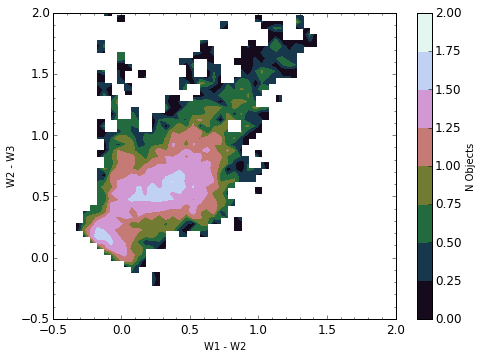

In [26]:
color_color(agbs, "w1", "w2", "w2", "w3", xmax=2, ymax=2, fname="../figures/agbs_color_color.pdf")

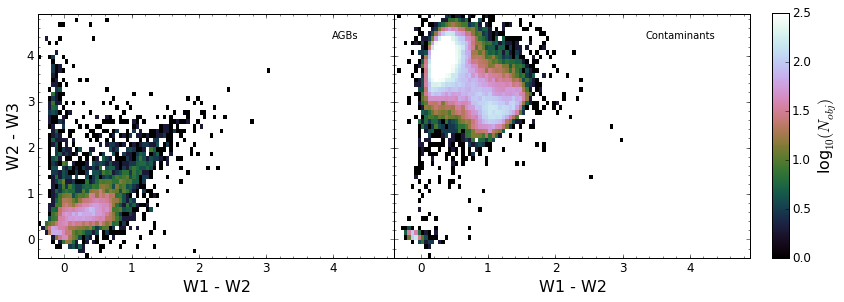

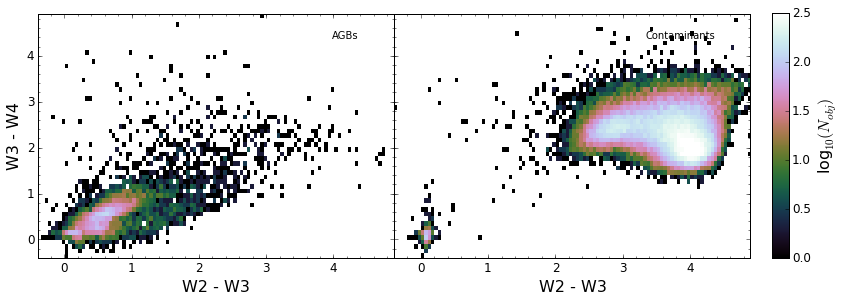

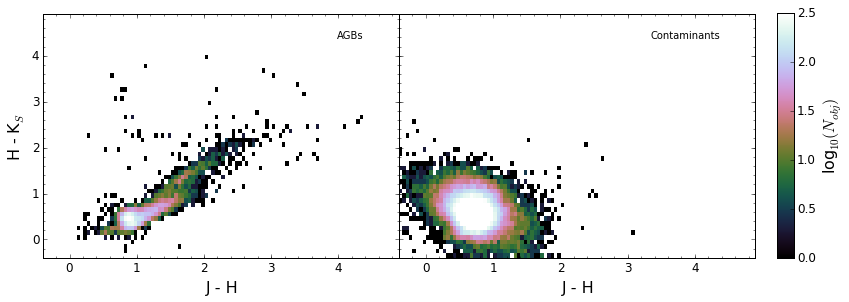

In [31]:
color_color_compare(agbs, contams,"w1","w2","w2","w3", cmap1=plt.cm.cubehelix, cmap2=plt.cm.cubehelix, xmax=4.9, ymax=4.9, vmax=2.5, fname="../figures/agbs_contaminants_color_color1.pdf", plttext1="AGBs", plttext2="Contaminants")
color_color_compare(agbs, contams,"w2","w3","w3","w4", cmap1=plt.cm.cubehelix, cmap2=plt.cm.cubehelix, xmax=4.9, ymax=4.9, vmax=2.5, fname="../figures/agbs_contaminants_color_color2.pdf", plttext1="AGBs", plttext2="Contaminants")
color_color_compare(agbs, contams,"jmag","hmag","hmag","kmag", cmap1=plt.cm.cubehelix, cmap2=plt.cm.cubehelix, xmax=4.9, ymax=4.9, vmax=2.5, fname="../figures/agbs_contaminants_color_color3.pdf", plttext1="AGBs", plttext2="Contaminants", xlabel="J - H", ylabel="H - K$_S$")

### Sample Completeness
We can define overall sample completeness by looking at the number of objects retained after color-color criteria are applied. We can also look at positional completeness, and completeness in color color space.

The top panel shows positional completeness, with bins of 1$^\circ$ on each axis. The sources are dominated by objects obtained by SIMBAD so they mostly trace out that footprint, but completeness dips in regions of high stellar number density and dust extinction.

The bottom two panels show the color-color criteria we're using to reduce our sample. We want to know not just what the overall completeness is, but how that completeness varies in color-color space. Binning is in 0.1 dex on each axis.

The color scale shows completeness as a fraction of 1.0 (where 1.0 is full representation) in log space. So "-0.4" is a completeness of 10$^{-0.4}$ which is 0.398, or 39.8%

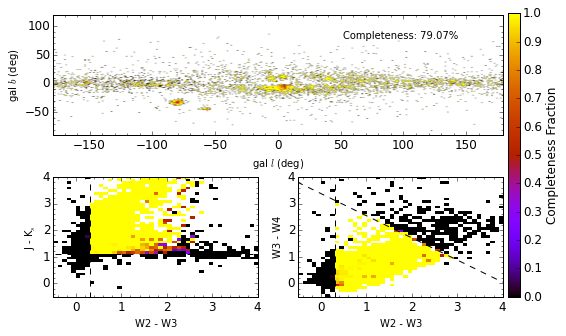

In [32]:
completeness_galmap_colmap(agbs, cuts=(agbs.coljk > 1.1) & (agbs.col23 > 0.3) & (agbs.col34 < -0.83*agbs.col23 + 3.37), vmin=0., cmap=plt.cm.gnuplot, outfile="../figures/completeness_map.pdf")

### Contamination from Galactic and Extragalactic Sources
We define contamination as

$\eta = \frac{N_{cont}}{N_{cont} + N_{samp}}$

where $N_{cont}$ is the number of contaminant objects and $N_{samp}$ is the number of sample objects. With the same binning and color criteria as above, we see how contaminated our sample is with position and color.

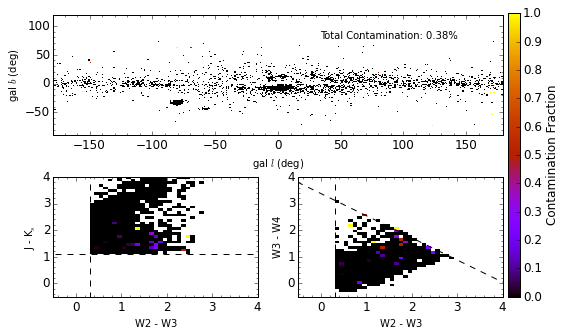

In [33]:
contamination_galmap_colmap(cut_me(agbs), contams, cuts=(contams.coljk > 1.1) & (contams.col23 > 0.3) & (contams.col34 < -0.83*contams.col23 + 3.37), vmax=1.0, outfile="../figures/contamination_map.pdf")

These are color-magnitude comparisons for before (left) and after (right) the selection criteria.

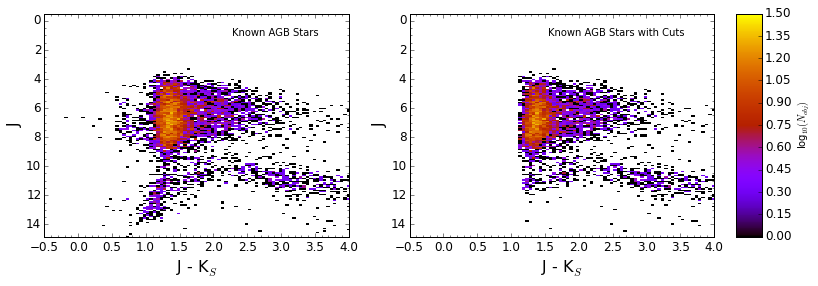

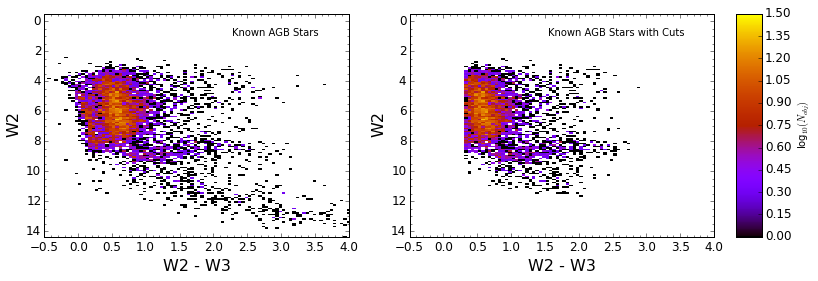

In [34]:
color_mag_compare(agbs, cut_me(agbs),"jmag","kmag","kmag",plttext1="Known AGB Stars", plttext2="Known AGB Stars with Cuts", xlabel="J - K$_S$", ylabel="J")
color_mag_compare(agbs, cut_me(agbs),"w2","w3","w2",plttext1="Known AGB Stars", plttext2="Known AGB Stars with Cuts", xlabel="W2 - W3", ylabel="W2")

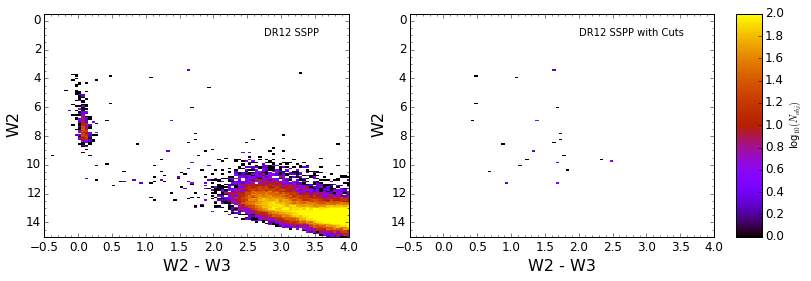

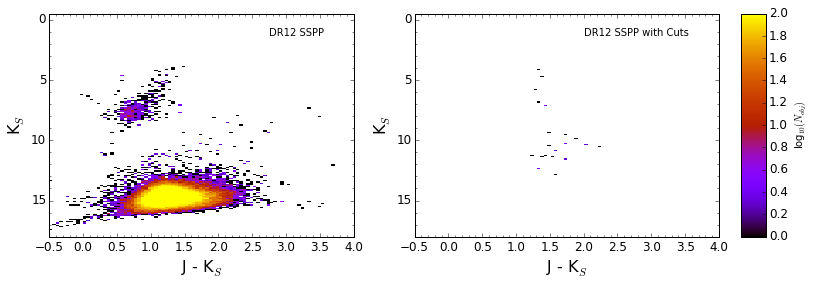

In [35]:
color_mag_compare(sspp, cut_me(sspp),"w2","w3","w2",plttext1="DR12 SSPP", plttext2="DR12 SSPP with Cuts", ymax=15, vmax=2, xlabel="W2 - W3", ylabel="W2")
color_mag_compare(sspp, cut_me(sspp),"jmag","kmag","kmag",plttext1="DR12 SSPP", plttext2="DR12 SSPP with Cuts", ymax=18, vmax=2, xlabel="J - K$_{S}$", ylabel="K$_{S}$")

### Histogram of Contaminating Objects
There are still a small amount of objects from the SDSS SSPP and the VAGC left over after cutting on color. Noting that both the SSPP and VAGC contain a variety of objects from stars to AGN, we want to see exactly what (spectroscopically identified) classes remain after cutting.

In [37]:
cut_sspp = cut_me(sspp)
cut_vagc = cut_me(vagc)
vagc_classes = list(set(vagc.CLASS))
sspp_classes = list(set(cut_sspp.SPECTYPE_SUBCLASS))

In [38]:
sspp_numbers = []
vagc_numbers = []

for ii in range(len(sspp_classes)):
    sspp_numbers.append(sum(cut_sspp.SPECTYPE_SUBCLASS == sspp_classes[ii]))
for ii in range(len(vagc_classes)):
    vagc_numbers.append(sum(cut_vagc.CLASS == vagc_classes[ii]))

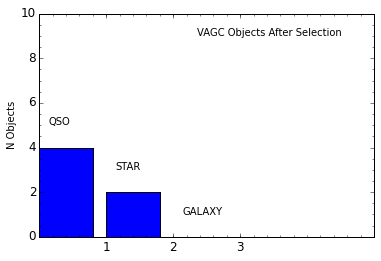

In [41]:
plt.figure(figsize=(6,4))
ax = plt.subplot(111)
ax.bar(range(len(vagc_classes)), vagc_numbers)
for ii in range(len(vagc_classes)):
    ax.text(ii+0.15, vagc_numbers[ii]+1, vagc_classes[ii])

ax.set_xlim(0,5)
ax.set_ylim(0,10)
ax.set_ylabel("N Objects")
ax.set_xticks(range(1, len(vagc_classes)+1))
ax.text(0.9, 0.9, "VAGC Objects After Selection", transform=ax.transAxes, horizontalalignment="right")
ax.minorticks_on()
plt.savefig("../figures/contaminating_vagc_objects_classes.pdf")

plt.show()

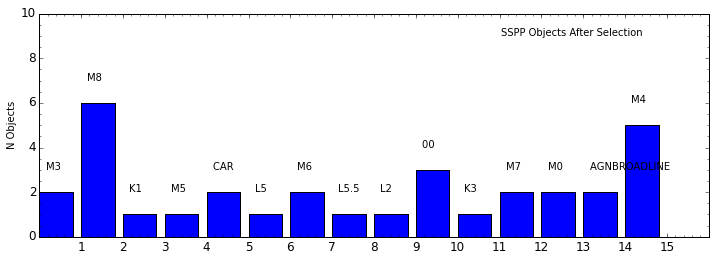

In [43]:
plt.figure(figsize=(12,4))
ax = plt.subplot(111)
ax.bar(range(len(sspp_classes)), sspp_numbers)
for ii in range(len(sspp_classes)):
    ax.text(ii+0.15, sspp_numbers[ii]+1, sspp_classes[ii])

# ax.set_xlim(0,5)
ax.set_ylim(0,10)
ax.set_ylabel("N Objects")
ax.set_xticks(range(1, len(sspp_classes)+1))
ax.text(0.9, 0.9, "SSPP Objects After Selection", transform=ax.transAxes, horizontalalignment="right")
ax.minorticks_on()
plt.savefig("../figures/contaminating_sspp_objects_classes.pdf")

plt.show()

### SSPP Contaminants in Color-Color Space
Since objects from the SSPP dominate the number of contaminants left after selection, we want to see if the contaminating SSPP objects are clustered or randomly distributed.

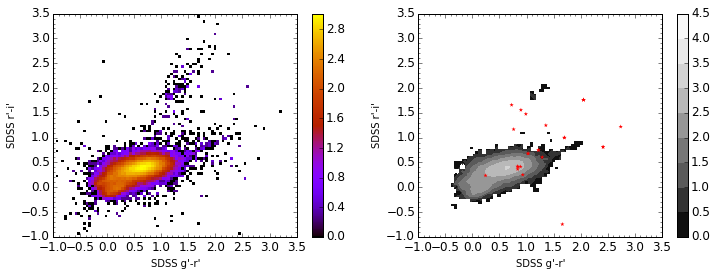

In [44]:
xbins = np.arange(-2,5+.05,.05)
ybins = np.arange(-2,5+.05,.05)

H, xedges, yedges = np.histogram2d(sspp.GR, sspp.RI, bins=(xbins,ybins))
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.imshow(np.log10(H.T), extent=extent, aspect="auto", interpolation="nearest", cmap=plt.cm.gnuplot, origin="lower")
plt.colorbar()

plt.xlabel("SDSS g'-r'")
plt.ylabel("SDSS r'-i'")
plt.xlim(-1,3.5)
plt.ylim(-1,3.5)
plt.minorticks_on()

plt.subplot(122)
plt.contourf(np.log10(H.T), levels=np.arange(0,5,0.5),extent=extent, aspect="auto", interpolation="nearest", cmap=plt.cm.Greys_r)
plt.colorbar()
plt.scatter(cut_sspp.GR, cut_sspp.RI,c='red', edgecolor="None",marker="*")

plt.xlabel("SDSS g'-r'")
plt.ylabel("SDSS r'-i'")
plt.xlim(-1,3.5)
plt.ylim(-1,3.5)
plt.minorticks_on()
plt.savefig("../figures/contaminating_sspp_objects.pdf")
plt.show()